# Termingeschäfte (Futures)

Weitergehende Quellen: 

* https://de.wikipedia.org/wiki/Terminkontrakt
* http://www.investopedia.com/terms/f/futurescontract.asp

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Terminkontrakte bekommen

Ein Bezug zu einem Terminkontrakt wird über die Funktion symbols hergestellt. Terminkontrakte sind gekennzeichnet mit einem Grundsymbol und einem Code für Monat/Jahr der Auslieferung. CLF16 ist ein Kontrakt für Rohöl (crude oil (CL)) mit Auslieferung im Januar (F) 2016 (16).

### Liste aller verfügbaren Terminkontrakte (auf Quantopian)

Symbol | Future |
--- | --- | 
BD | Big Dow
BO | Soybean Oil
CM | Corn E-Mini
CN | Corn
DJ | DJIA Futures
ET | Ethanol
FF | 30-Day Federal Funds
FI | 5-Year Deliverable Interest Rate Swap Futures
FS | 5-Year Interest Rate Swap Futures
FV | 5-Year T-Note
MB | Municipal Bonds
MS | Soybeans E-Mini
MW | Wheat E-Mini
OA | Oats
RR | Rough Rice
SM | Soybean Meal
SY | Soybeans
TN | 10-Year Deliverable Interest Rate Swap Futures
TS | 10-Year Interest Rate Swap Futures
TU | 2-Year T-Note
TY | 10-Year T-Note
UB | Ultra Tbond
US | 30-Year T-Bond
WC | Wheat
YM | Dow Jones E-mini
VX | VIX Futures
AD | Australian Dollar
AI | Bloomberg Commodity Index Futures
BP | British Pound
CD | Canadian Dollar
EC | Euro FX
ED | Eurodollar
EE | Euro FX E-mini
ES | S&P 500 E-Mini
EU | E-micro EUR/USD Futures
FC | Feeder Cattle
JE | Japanese Yen E-mini
JY | Japanese Yen
LB | Lumber
LC | Live Cattle
LH | Lean Hogs
MD | S&P 400 MidCap Futures
ME | Mexican Peso
MI | S&P 400 MidCap E-Mini
ND | NASDAQ 100 Futures
NK | Nikkei 225 Futures
NQ | NASDAQ 100 E-Mini
NZ | New Zealand Dollar
SF | Swiss Franc
SP | S&P 500 Futures
TB | TBills
GC | Gold
HG | Copper High Grade
SV | Silver
CL | Light Sweet Crude Oil
HO | NY Harbor ULSD Futures
HU | Unleaded Gasoline
NG | Natural Gas
PA | Palladium
PL | Platinum
PB | Pork Bellies
QG | Natural Gas E-mini
QM | Crude Oil E-Mini
XB | RBOB Gasoline Futures
EI | MSCI Emerging Markets Mini
EL | Eurodollar NYSE LIFFE
MG | MSCI EAFE Mini
XG | Gold mini-sized
YS | Silver mini-sized
RM | Russell 1000 Mini
SB | Sugar #11
ER | Russell 2000 Mini

## Liste von Datum/Zeit - Codes 

Month | Code |
--- | --- | 
January | F
February | G
March | H
April | J
May | K
June | M
July | N
August | Q
September | U
October | V
November | X
December | Z

Nehmen wir die Terminkontraktdaten für Erdgas mit einem Fälligkeitsdatum im Januar 2018. (Falls Du diese Lektion in der Zukunft ansiehst, wähle ein weiter fortgeschrittenes Fälligkeitsdatum)

In [82]:
future_contract = symbols('NGF18')

In [83]:
future_contract.asset_name

u'Natural Gas'

In [84]:
for key in future_contract.to_dict():
    print(key)
    print(future_contract.to_dict()[key])
    print('\n')

root_symbol
NG


tick_size
0.001


end_date
2017-08-08 00:00:00+00:00


exchange
NYMEX


auto_close_date
2017-12-22 00:00:00+00:00


expiration_date
2017-12-27 00:00:00+00:00


symbol
NGF18


multiplier
10000.0


notice_date
2017-12-28 00:00:00+00:00


first_traded
None


asset_name
Natural Gas


exchange_full
NYMEX


sid
1061201801


start_date
2010-08-24 00:00:00+00:00




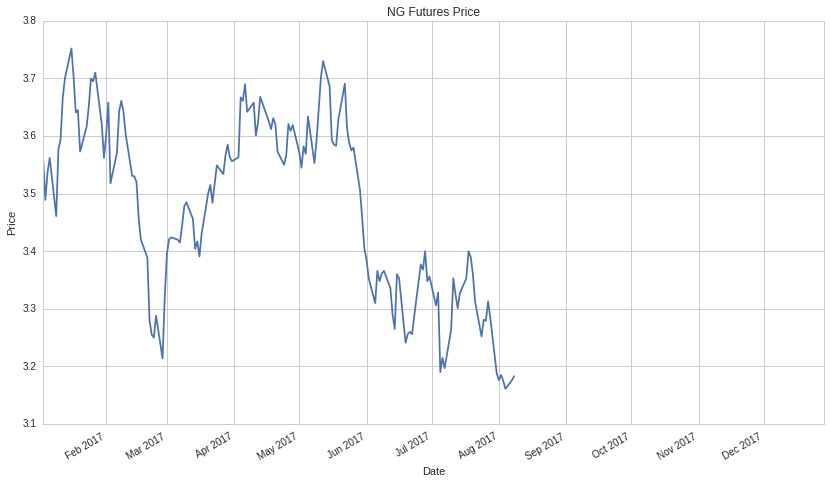

In [85]:
futures_position_value = get_pricing(future_contract, start_date = '2017-01-01', end_date = '2018-01-01', fields = 'price')
futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()
plt.title('NG Futures Price')
plt.xlabel('Date')
plt.ylabel('Price');

## Historische Daten

In [86]:
from quantopian.research.experimental import history

In [87]:
print history.__doc__


    Load a table of historical trade data.

    Parameters
    ----------
    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.
        Valid input types are Asset, Integral, basestring, or ContinuousFuture.
        In the case that the passed objects are strings, they are interpreted
        as ticker symbols and resolved relative to the date specified by
        symbol_reference_date.

    fields : str or list, optional
        String or list drawn from {'price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'}. Defaults to 'close_price'.

    frequency : {'daily', 'minute'}, optional
        Resolution of the data to be returned. Defaults to 'daily'.

    start_date : str or pd.Timestamp, optional
        String or Timestamp representing a start date or start intraday minute
        for the returned data. Defaults to '2013-01-03'.

    end_date : str or pd.Timestamp, optional
        String or Timestamp representing an end date or e

In [88]:
ngf18 = future_contract

In [89]:
ngf18_data = history(ngf18, 
                     fields=['price', 'open_price', 'high', 'low', 'close_price', 'volume', 'contract'], 
                     frequency='daily', 
                     start_date='2017-06-01', 
                     end_date='2017-08-01')

ngf18_data.head()

price  open_price   high    low  close_price  \
2017-06-01 00:00:00+00:00  3.385       3.412  3.435  3.341        3.385   
2017-06-02 00:00:00+00:00  3.353       3.386  3.386  3.336        3.353   
2017-06-05 00:00:00+00:00  3.310       3.373  3.378  3.298        3.310   
2017-06-06 00:00:00+00:00  3.366       3.318  3.371  3.307        3.366   
2017-06-07 00:00:00+00:00  3.348       3.370  3.393  3.342        3.348   

                           volume                    contract  
2017-06-01 00:00:00+00:00  5497.0  Future(1061201801 [NGF18])  
2017-06-02 00:00:00+00:00  2443.0  Future(1061201801 [NGF18])  
2017-06-05 00:00:00+00:00  2457.0  Future(1061201801 [NGF18])  
2017-06-06 00:00:00+00:00  2061.0  Future(1061201801 [NGF18])  
2017-06-07 00:00:00+00:00  1834.0  Future(1061201801 [NGF18])

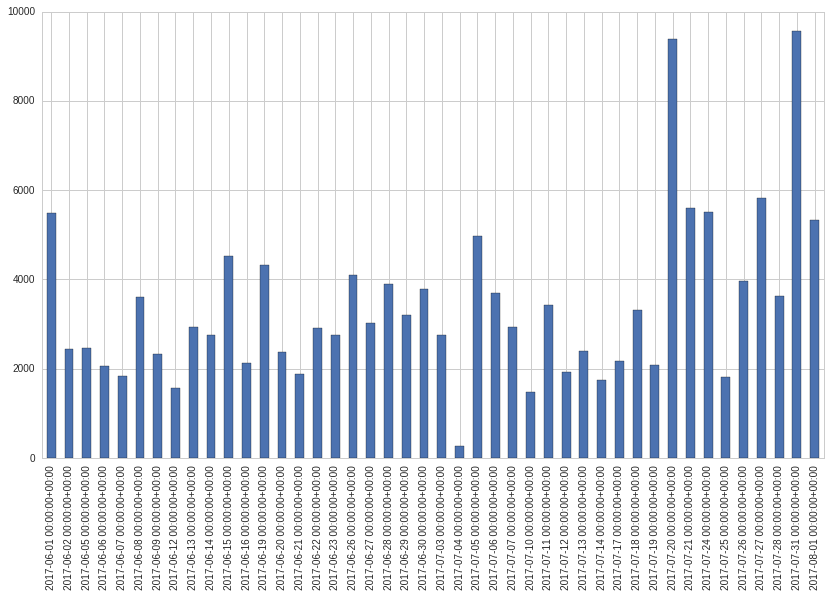

In [90]:
# Beachte besonders den 4. Juli!
ngf18_data['volume'].plot(kind='bar')

## Vergleich verschiedener Fälligkeitsdaten

In [91]:
ng_contracts = symbols(['NGF17', 'NGG17', 'NGH17', 'NGJ17', 'NGK17', 'NGM17'])

In [92]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start_date='2016-01-01', 
                                         end_date='2017-08-01')

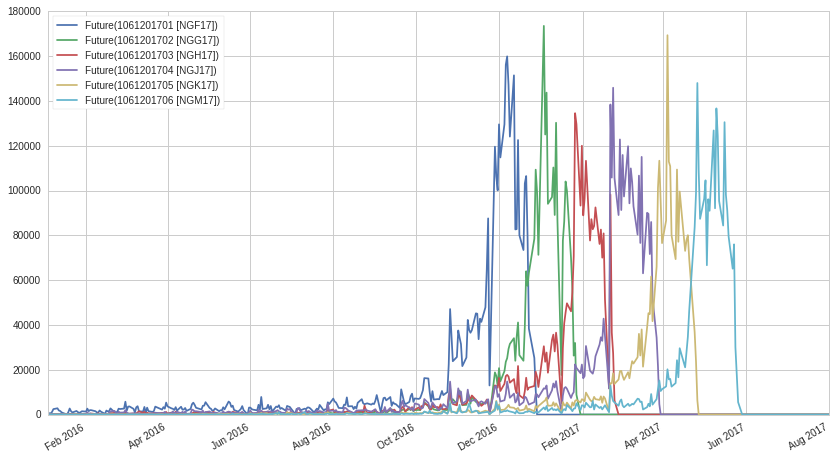

In [93]:
ng_consecutive_contract_volume.plot()

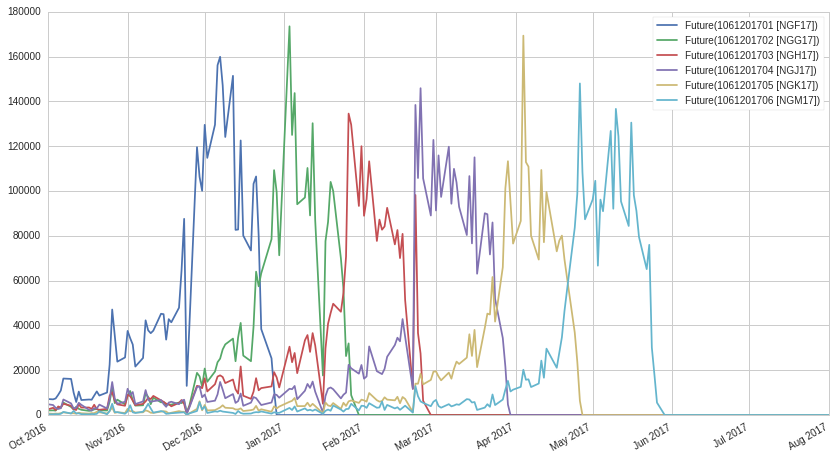

In [94]:
ng_consecutive_contract_volume.plot(xlim=['2016-10-01','2017-08-01'])

Die Handelsaktivität springt von einem Kontrakt zum nächsten. Übergänge passieren genau vor dem Ausführungsdatum des einzelnen Kontrakts.

Dieses Phänomen kann es schwierig machen mit Terminkontrakten zu arbeiten. Dass beim Handeln oder Simulieren von Termingeschäften explizit Bezug auf eine Reihe ineinander übergehender Kontrakte genommen werden muss, kann großen Aufwand bedeuten.

Um aufeinanderfolgende Kontrakte für dasselbe zugrundeliegende Termingeschäft zu handeln können wir etwas verwenden, das "Kontinuierliche Termingeschäfte" genannt wird.

# Kontinuierliche Termingeschäfte (Continuous Futures)

Kontinuierliche Termingeschäfte sind Abstraktionen über die "zugrundeliegenden" Handelswaren/Vermögen/Indizes von Termingeschäften. Wenn wir zum Beispiel Rohöl handeln wollten, würden wir eine Referenz auf CL anstelle einer Reihe von CL Kontrakten erstellen. Kontinuierliche Termingeschäfte erhalten im Wesentlichen einen Bezug auf einen "laufenden" Kontrakt, der als der aktive Kontrakt für diesen bestimmten Basiswert gilt.

Wir verwenden die kontinuierlichen Termingeschäftsobjekte als Teil der Plattform, um eine kontinuierliche Kette historischer Daten für Terminkontrakte zu erhalten, wobei wir diese Konzerne betrachten. Es gibt verschiedene Wege, um die Transportkosten auszugleichen, wenn man sich die historischen Daten anschaut, wobei die Leute unterschiedliche Wege bevorzugen. Der allgemeine Konsens ist, dass eine Anpassung vorgenommen werden sollte.

Kontinuierliche Termingeschäfte sind keine handelbaren Vermögen. Sie erhalten eine Referenz auf den aktuell aktiven Kontrakt, der sich auf einen gegebenen Basiswert bezieht.

In [95]:
from quantopian.research.experimental import continuous_future

In [96]:
print(continuous_future.__doc__)


    Create a specifier for a continuous contract.

    Parameters
    ----------
    root_symbol : str
        The root symbol for the continuous future.

    offset : int, optional
        The distance from the primary contract. Default is 0.

    roll : str, optional
        How rolls are determined. Options are 'volume' and 'calendar'. Default
        is 'volume'.

    adjustment : str
        Method for adjusting lookback prices between rolls. Options are
        'mul', 'add', and None. Default is 'mul'.

    Returns
    -------
    continuous_future : ContinuousFuture
        The continuous future specifier.
    


Es gibt 4 Argumente, die wir berücksichtigen müssen.

- **`Wurzelsymbol`**: Das Wurzelsymbol des Basiswerts, zum Beispiel "CL" für Rohöl.
- **`offset`**: Der Abstand vom primären Kontrakt. 0 = primär, 1 = sekundär, etc. Wir werden später mehr darüber erfahren.
- **`roll`**: Wie man den "laufenden" Kontrakt des kontinuierlichen Termingeschäfts bestimmt. Derzeitige Optionen sind **`'volume'`** und **`'calendar'`**. Der "Volumen"-Zugang wählt den derzeit aktiven Kontrakt anhand des Handelsvolumens. Der "Kalender"-Zugang wählt ihn einfach anhand des `auto_close_date` jedes einzelnen Kontrakts.
- **`Anpassung`**: Wie historische Preise von früheren Kontrakten angepasst werden müssen. Mehr dazu später. Optionen sind **`'mul'`**, **`'add'`**, oder **`'None'`**.

In [97]:
continuous_ng = continuous_future('NG', offset=0, roll='volume', adjustment='mul')

In [98]:
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [99]:
ng_cont_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start_date='2016-10-01', 
                    end_date='2017-08-01')

In [100]:
ng_cont_active.head()

price    volume                    contract
2016-10-03 00:00:00+00:00  4.067   86282.0  Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00  4.161   90845.0  Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00  4.245  119522.0  Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00  4.251  135372.0  Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00  4.438  159697.0  Future(1061201611 [NGX16])

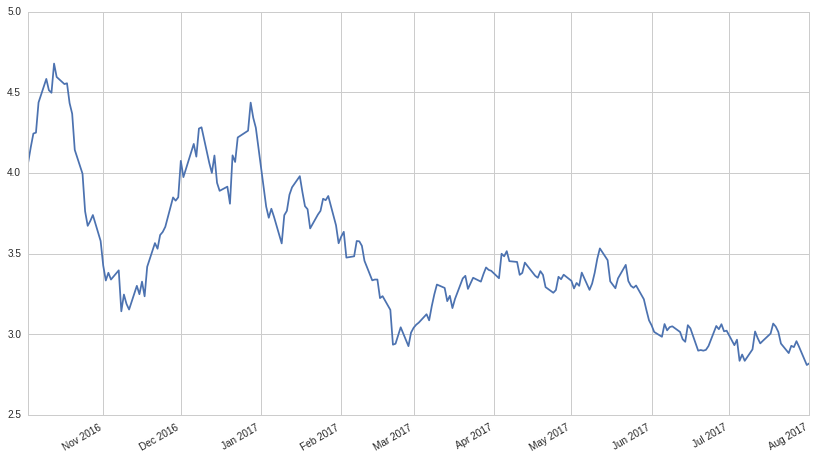

In [101]:
ng_cont_active['price'].plot()

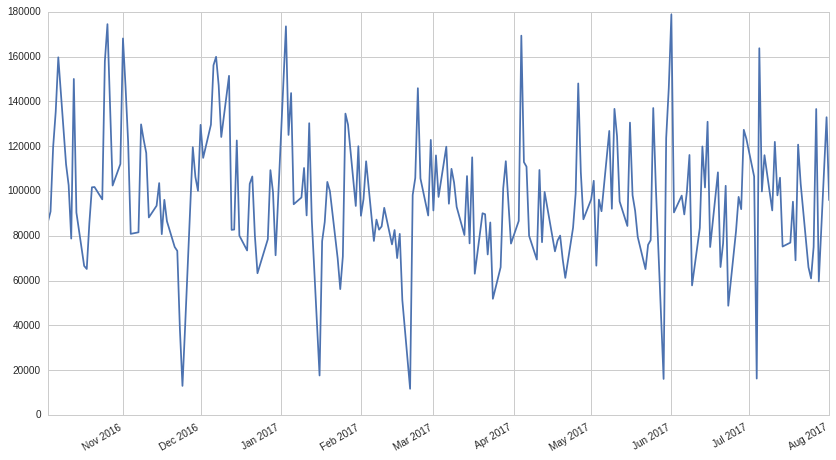

In [102]:
ng_cont_active['volume'].plot()

In [103]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start_date='2016-10-01', 
                                         end_date='2017-08-01')

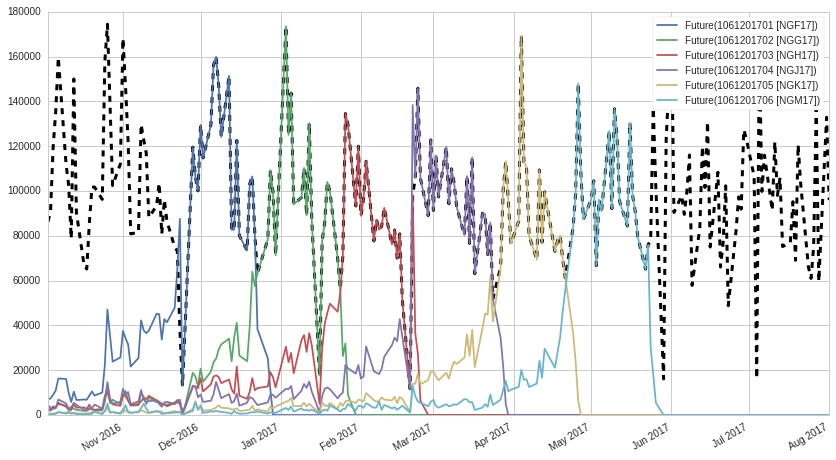

In [104]:
ax = ng_cont_active['volume'].plot(ls='--',c='black',lw=3)
ng_consecutive_contract_volume.plot(ax=ax)

In [105]:
ng_consecutive_contract_price = history(ng_contracts, 
                                         fields='price', 
                                         frequency='daily', 
                                         start_date='2016-10-01', 
                                         end_date='2017-08-01')

In [106]:
ng_continuous_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start_date='2016-10-01', 
                    end_date='2017-08-01')

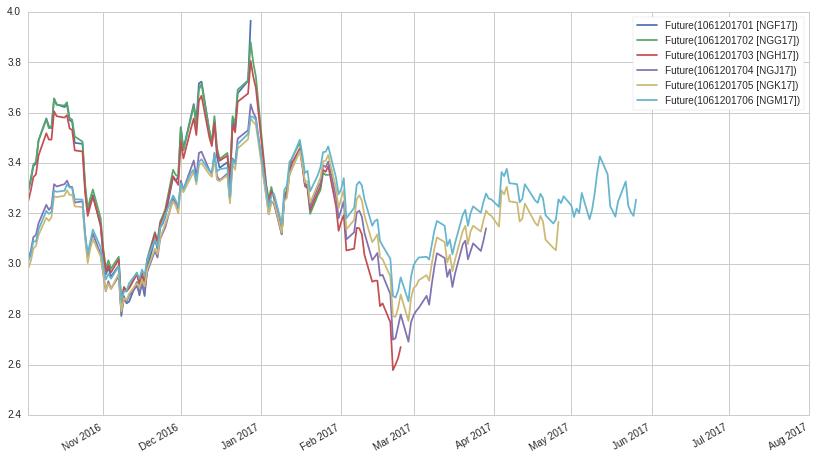

In [107]:
ng_consecutive_contract_price.plot()

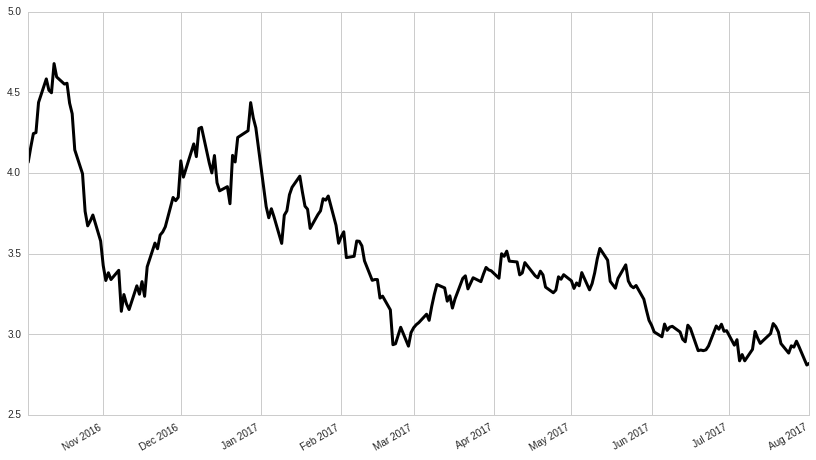

In [108]:
ng_cont_active['price'].plot(c='black',lw=3)

Dies repräsentiert den Preis der zugrundeliegenden Handelsware, NG, auf dem am aktivsten gehandelten Kontrakt. Viel einfacher anzusehen.

Vielleicht hast Du bemerkt, dass der Preis in diesem Diagramm am Anfang 4.0 überschreitet, aber als wir die einzelnen Kontrakte dargestellt haben, stieg er kaum über 3.6. Das liegt an der Anpassung des historischen Preises an Sprünge zwischen Kontrakten.

Die beste Art, das zu erklären ist die grafische Darstellung der Preishistorie des nicht angepassten kontinuierlichen Termingeschäfts.

In [111]:
continuous_ng_unadjusted = continuous_future('NG', offset=0, roll='volume', adjustment=None)

In [115]:
ng_unadjusted_history = history(continuous_ng_unadjusted, 
                                fields=['contract', 'price'], 
                                frequency='daily', 
                                start_date='2016-10-01', 
                                end_date='2017-08-01')

In [117]:
ng_unadjusted_history.head()

price                    contract
2016-10-03 00:00:00+00:00  2.906  Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00  2.973  Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00  3.033  Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00  3.037  Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00  3.171  Future(1061201611 [NGX16])

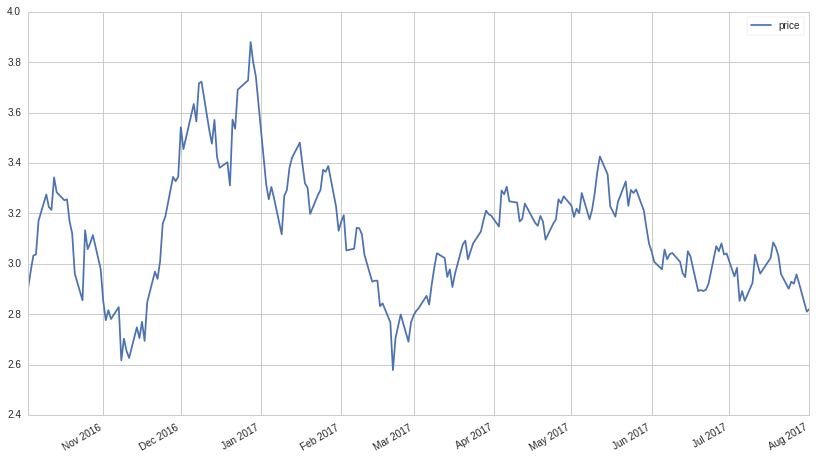

In [113]:
ng_unadjusted_history.plot()

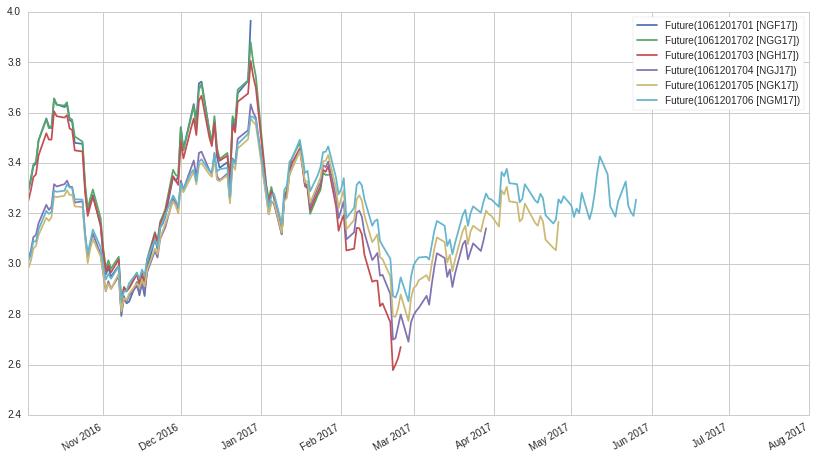

In [114]:
ng_consecutive_contract_price.plot()

In [118]:
pivot_unadj = ng_unadjusted_history.pivot(index=ng_unadjusted_history.index,columns='contract')

In [119]:
pivot_unadj.head()

price  \
contract                  Future(1061201611 [NGX16])   
2016-10-03 00:00:00+00:00                      2.906   
2016-10-04 00:00:00+00:00                      2.973   
2016-10-05 00:00:00+00:00                      3.033   
2016-10-06 00:00:00+00:00                      3.037   
2016-10-07 00:00:00+00:00                      3.171   

                                                      \
contract                  Future(1061201612 [NGZ16])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201701 [NGF17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201702 [NGG17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201703 [NGH17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201704 [NGJ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201705 [NGK17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201706 [NGM17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201707 [NGN17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201708 [NGQ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      
contract                  Future(1061201709 [NGU17])  
2016-10

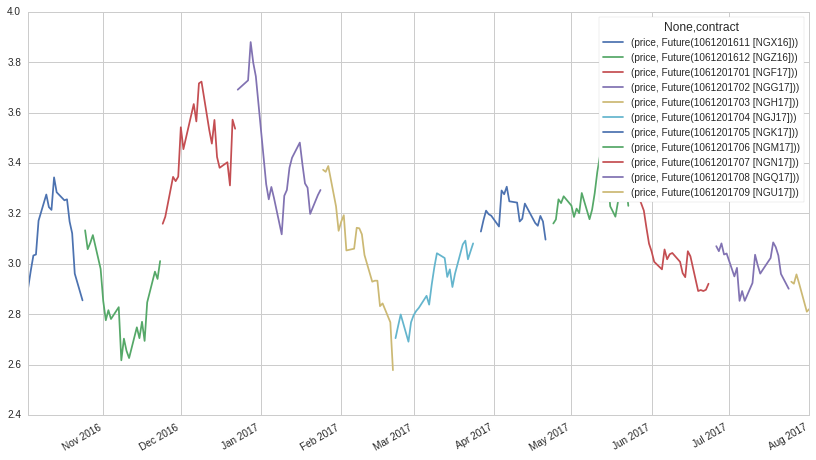

In [120]:
pivot_unadj.plot()

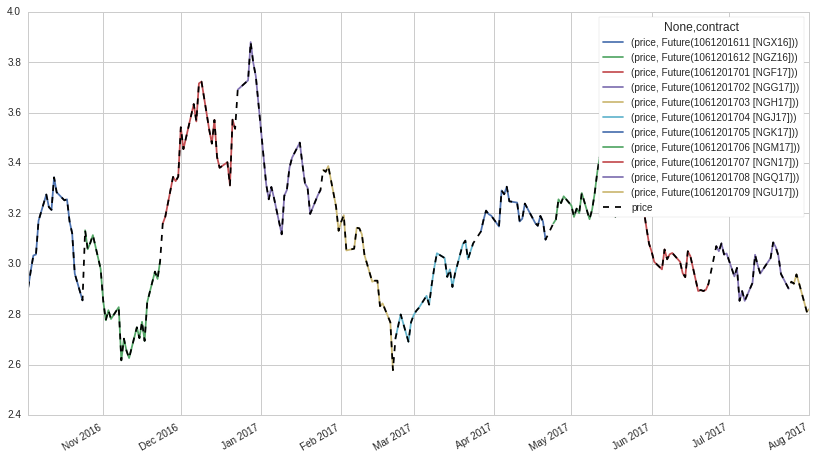

In [126]:
ax = pivot_unadj.plot()
ng_unadjusted_history.plot(ax=ax,ls='--',c='black')

## Anpassungsarten

Es gibt zwei Hauptarten von Anpassungen, additiv oder multiplikativ.

* Multiplikative Anpassung, 'mul'

Dies berechnet im Wesentlichen die Anpassung als Quotienten von neuem Kontraktpreis / alten Kontraktpreis, immer dann wenn der aktive Kontrakt einem neuen Kontrakt weicht.

* Arithmetische Anpassung, 'add'

Die Technik 'add' berechnet die Anpassung als Differenz neuer Kontraktpreis - alter Kontraktpreis